#Background
The Titanic was a British ocean liner that struck an iceberg and sunk on its maiden voyage in 1912 from the United Kingdom to New York. More than 1,500 of the estimated 2,224 passengers and crew died in the accident, making this one of the largest maritime disasters ever outside of war. The ship carried a wide range of passengers of all ages and both genders, from luxury travelers in first-class to immigrants in the lower classes. However, not all passengers were equally likely to survive the accident. We use real data about a selection of 891 passengers to learn who was on the Titanic and which passengers were more likely to survive.

#Libraries, Options, and Data 
Be sure that you have installed the titanic package before proceeding.

Define the titanic dataset starting from the titanic library with the following code:

In [2]:
options(digits = 3)    # report 3 significant digits
library(tidyverse)
install.packages("titanic")
library(titanic)

titanic <- titanic_train %>%
    select(Survived, Pclass, Sex, Age, SibSp, Parch, Fare) %>%
    mutate(Survived = factor(Survived),
           Pclass = factor(Pclass),
           Sex = factor(Sex))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
head(titanic)
#?titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
,<fct>,<fct>,<fct>,<dbl>,<int>,<int>,<dbl>
1,0,3,male,22,1,0,7.25
2,1,1,female,38,1,0,71.28
3,1,3,female,26,0,0,7.92
4,1,1,female,35,1,0,53.10
5,0,3,male,35,0,0,8.05
6,0,3,male,NA,0,0,8.46


#Question 1: Variable Types
Inspect the data and also use ?titanic_train to learn more about the variables in the dataset. Match these variables from the dataset to their variable type. There is at least one variable of each type (ordinal categorical, non-ordinal categorical, continuous, discrete).

Ans:

Survived: non-ordinal categorical

Pclass: ordinal categorical

Sex : non-ordinal categorical

SibSp: discrete

Parch: discrete

Fare:continuous

#Question 2: Demographics of Titanic Passengers
Make density plots of age grouped by sex. Try experimenting with combinations of faceting, alpha blending, stacking and using variable counts on the y-axis to answer the following questions. Some questions may be easier to answer with different versions of the density plot.

Warning message:
“Removed 177 rows containing non-finite values (stat_density).”


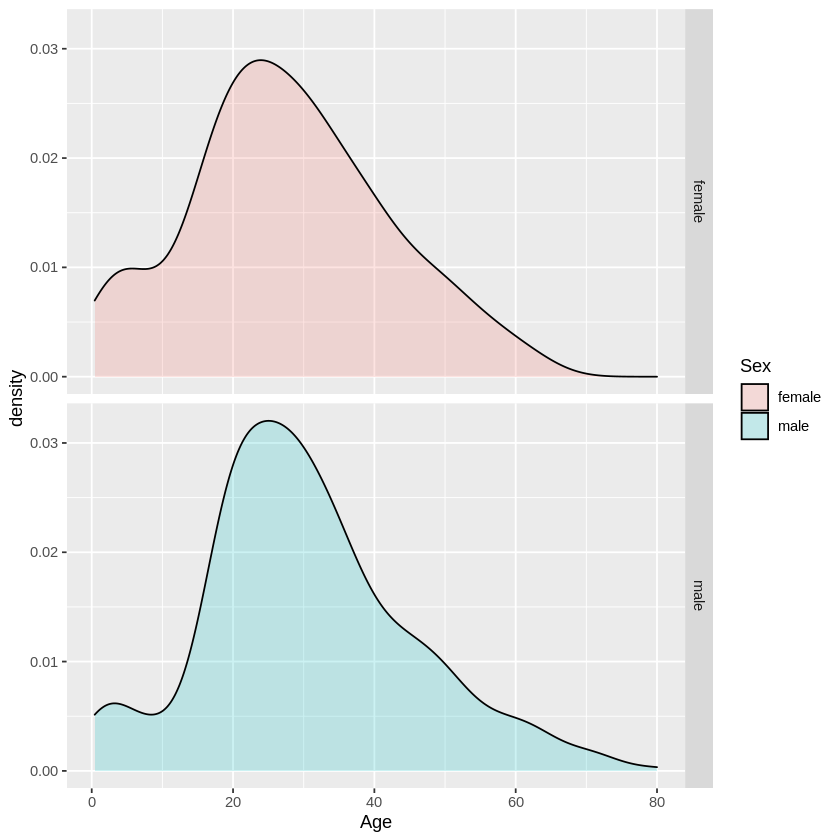

In [5]:
titanic %>% 
  ggplot(aes(Age,fill=Sex))+
  geom_density(alpha=0.2)+
  facet_grid(Sex~.)

-  Females and males had the same general shape of age distribution.
-  The age distribution was bimodal, with one mode around 25 years of age and a second smaller mode around 5 years of age.

Warning message:
“Removed 177 rows containing non-finite values (stat_density).”


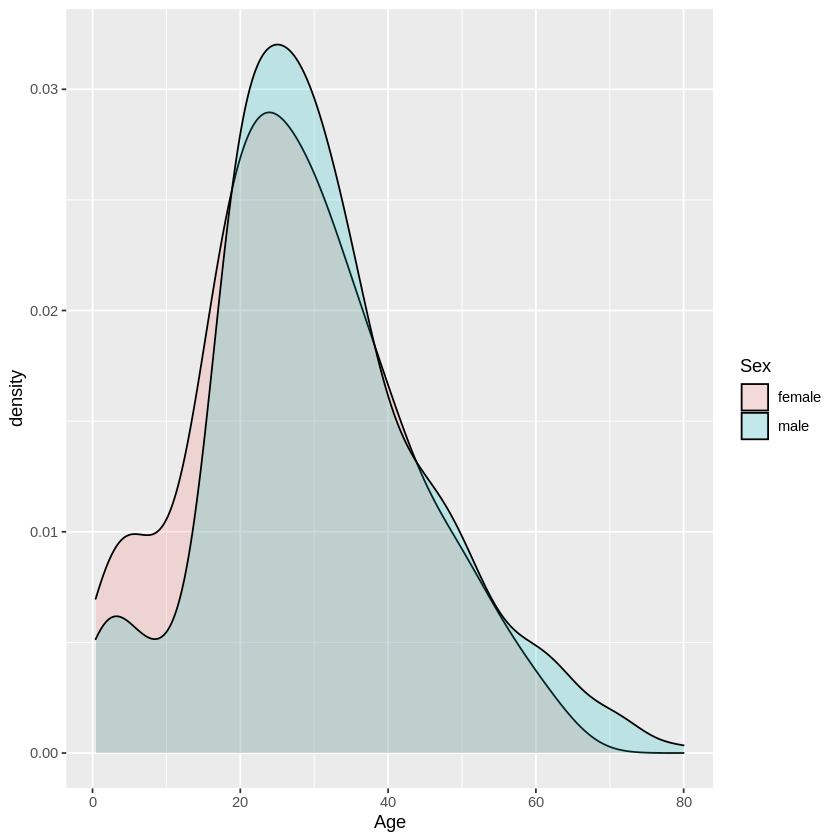

In [6]:
titanic %>%
    ggplot(aes(Age, fill = Sex)) +
    geom_density(alpha = 0.2)

- The proportion of males age 18-35 was higher than the proportion of females age 18-35.
- The proportion of females under age 17 was higher than the proportion of males under age 17.
- The oldest passengers were male

Warning message:
“Removed 177 rows containing non-finite values (stat_density).”


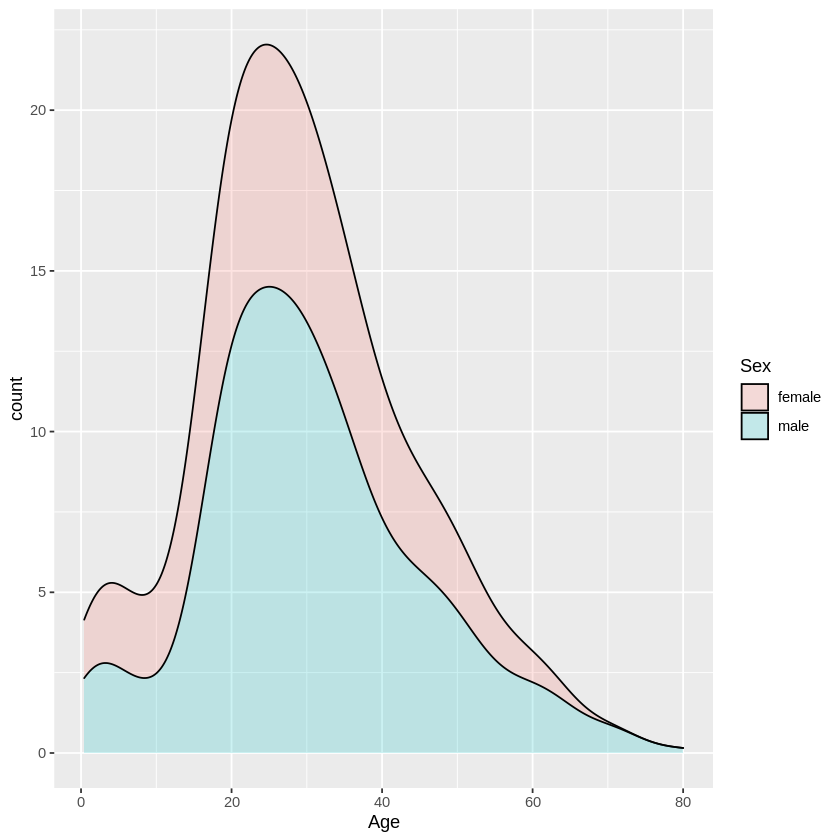

In [7]:
 titanic %>%
    ggplot(aes(Age, y = ..count.., fill = Sex)) +
    geom_density(alpha = 0.2, position = "stack")
        

A stacked density plot with count on the y-axis is useful for answering B, C and D. The main mode is around age 25 and a second smaller mode is around age 4-5. There are more males than females as indicated by a higher total area and higher counts at almost all ages. With count on the y-axis, it is clear that more males than females are age 40.

#Question 3: QQ-plot of Age Distribution

Use geom_qq() to make a QQ-plot of passenger age and add an identity line with geom_abline(). Filter out any individuals with an age of NA first. Use the following object as the dparams argument in geom_qq()

In [8]:

params <- titanic %>%
    filter(!is.na(Age)) %>%
    summarize(mean = mean(Age), sd = sd(Age))

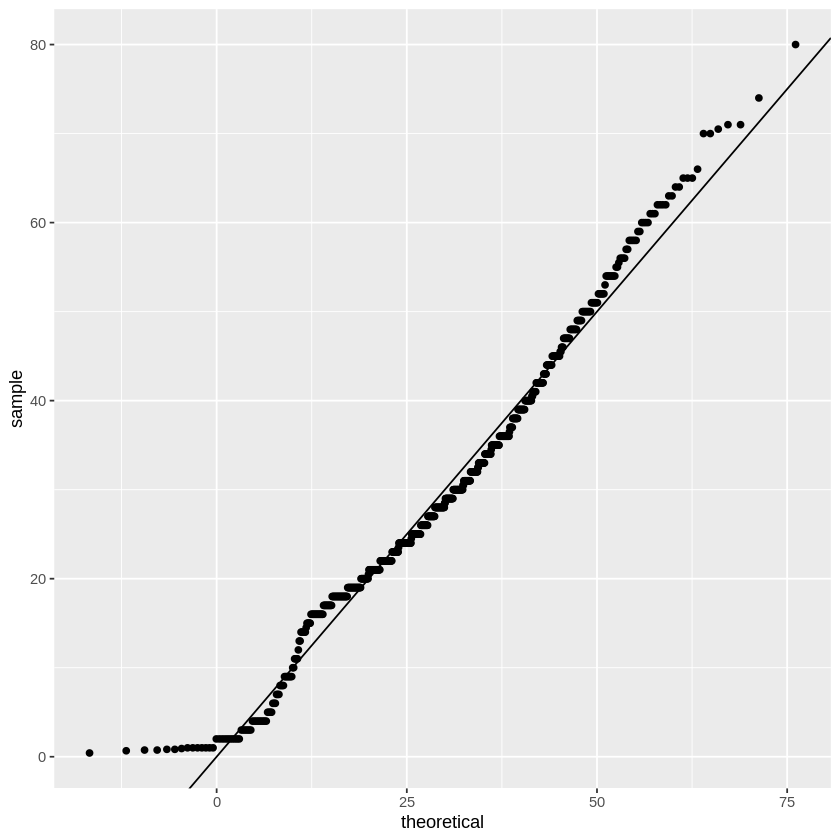

In [9]:
     titanic %>%
    filter(!is.na(Age)) %>%
    ggplot(aes(sample = Age)) +
    geom_qq(dparams = params) +
    geom_abline()

#Question 4: Survival by Sex
To answer the following questions, make barplots of the Survived and Sex variables using geom_bar(). Try plotting one variable and filling by the other variable. You may want to try the default plot, then try adding position = position_dodge() to geom_bar() to make separate bars for each group.

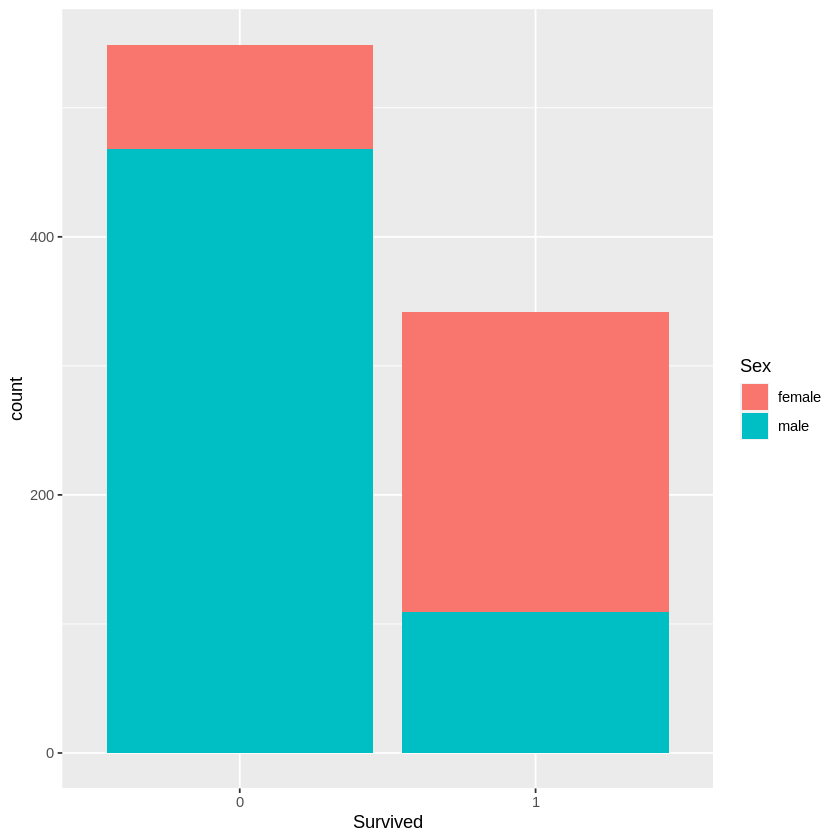

In [10]:
 #plot 1 - survival filled by sex
titanic %>%
    ggplot(aes(Survived, fill = Sex)) +
    geom_bar()

  - Less than half of passengers survived.
  - Most of the survivors were female.
  - Most of the females survived.

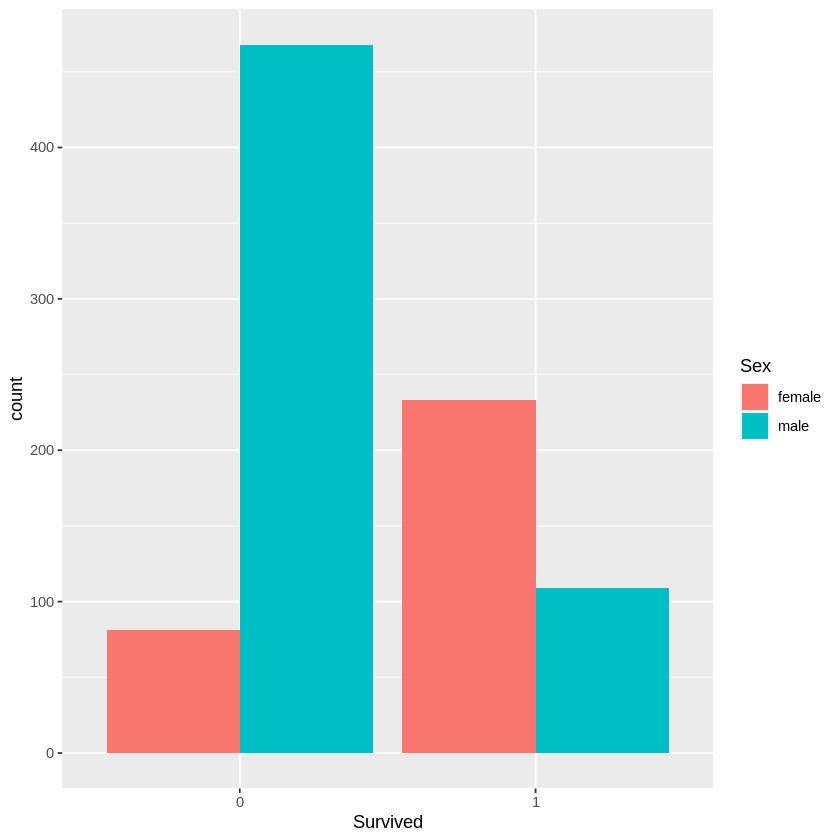

In [11]:
# plot 2 - survival filled by sex with position_dodge
titanic %>%
    ggplot(aes(Survived, fill = Sex)) +
    geom_bar(position = position_dodge())

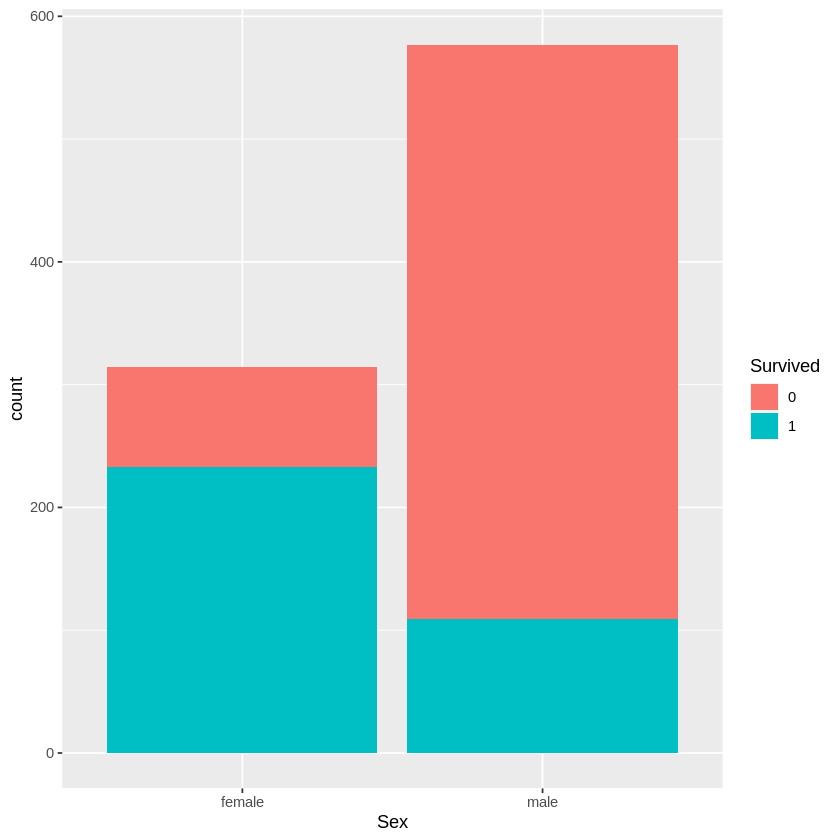

In [12]:
#plot 3 - sex filled by survival
titanic %>%
    ggplot(aes(Sex, fill = Survived)) +
    geom_bar()

##Question 5: Survival by Age
Make a density plot of age filled by survival status. Change the y-axis to count and set alpha = 0.2.


Warning message:
“Removed 177 rows containing non-finite values (stat_density).”


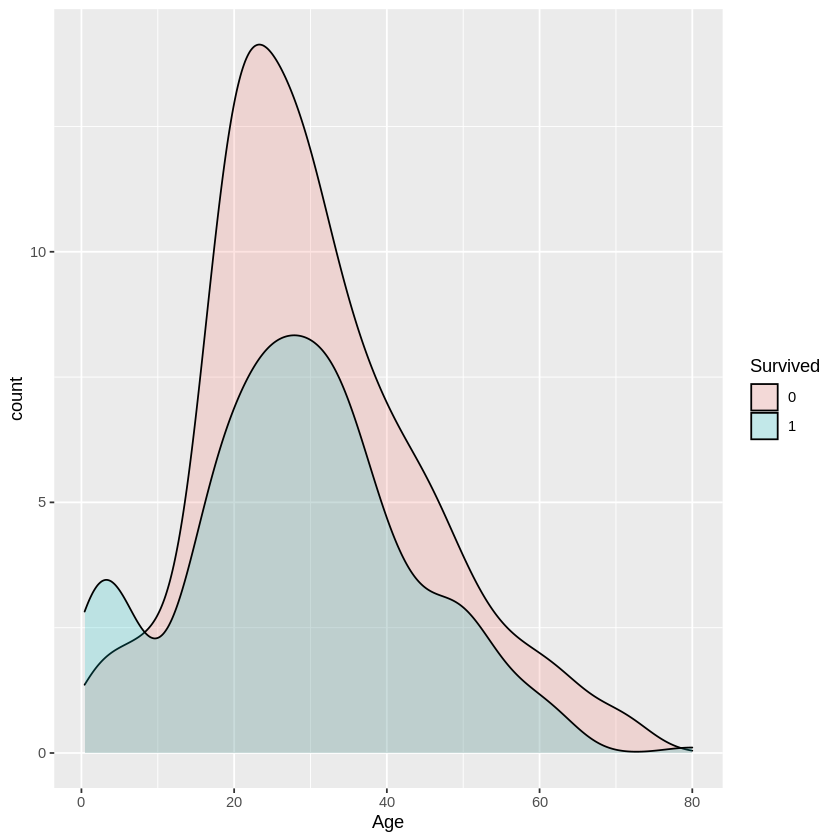

In [13]:
titanic %>%
    ggplot(aes(Age, y = ..count.., fill = Survived)) +
    geom_density(alpha = 0.2)

- Which age group is the only group more likely to survive than die?

Ans: 0-8
- Which age group had the most deaths?

Ans: 18 -30

- Which age group had the highest proportion of deaths?

Ans: 70-80

##Question 6: Survival by Fare

Filter the data to remove individuals who paid a fare of 0. Make a boxplot of fare grouped by survival status. Try a log2 transformation of fares. Add the data points with jitter and alpha blending.


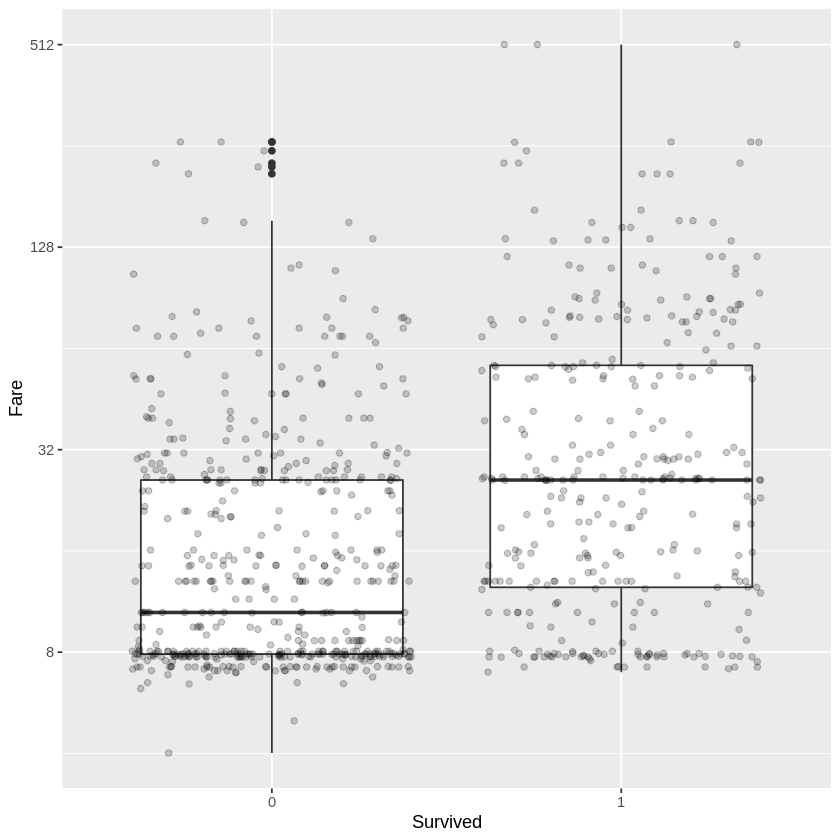

In [14]:
titanic %>%
    filter(Fare > 0) %>%
    ggplot(aes(Survived, Fare)) +
    geom_boxplot() +
    scale_y_continuous(trans = "log2") +
    geom_jitter(alpha = 0.2)

- Passengers who survived generally payed higher fares than those who did not survive.
- The median fare was lower for passengers who did not survive.
- Most individuals who paid a fare around $8 did not survive.

##Question 7: Survival by Passenger Class
The Pclass variable corresponds to the passenger class. Make three barplots. For the first, make a basic barplot of passenger class filled by survival. For the second, make the same barplot but use the argument position = position_fill() to show relative proportions in each group instead of counts. For the third, make a barplot of survival filled by passenger class using position = position_fill().

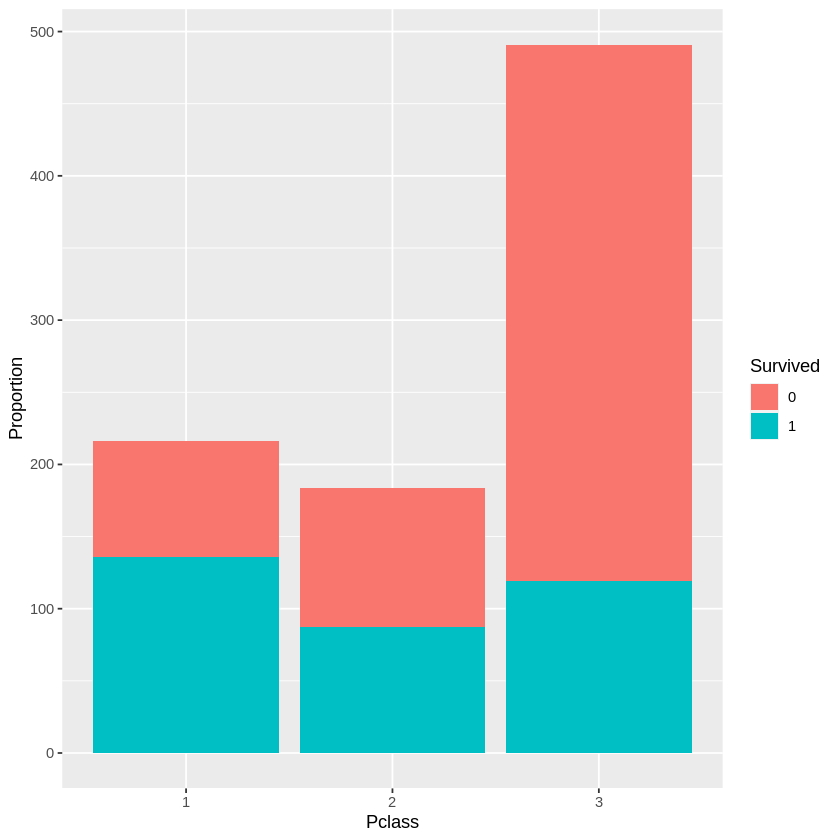

In [15]:
   # barplot of passenger class filled by survival
titanic %>%
    ggplot(aes(Pclass, fill = Survived)) +
    geom_bar() +
    ylab("Proportion")


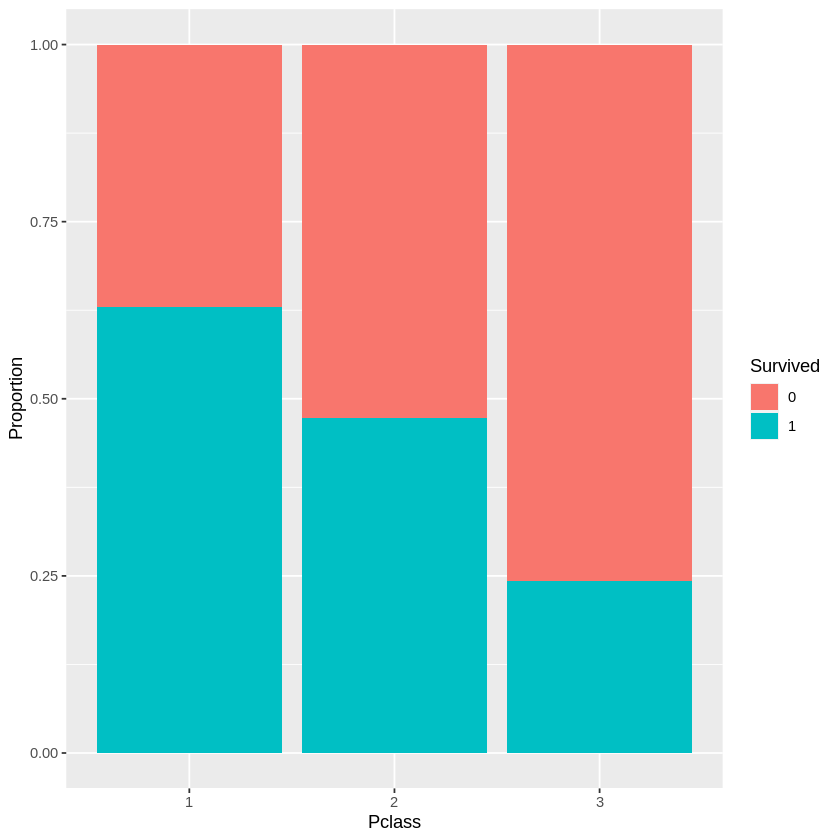

In [16]:
# barplot of passenger class filled by survival with position_fill
titanic %>%
    ggplot(aes(Pclass, fill = Survived)) +
    geom_bar(position = position_fill()) +
    ylab("Proportion")


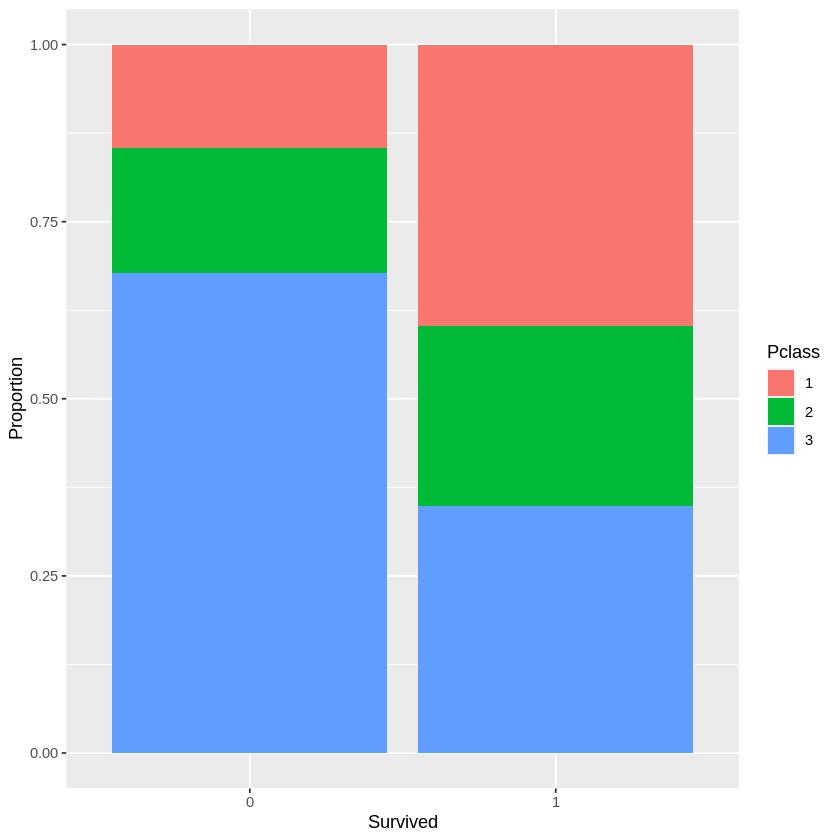

In [17]:
# Barplot of survival filled by passenger class with position_fill
titanic %>%
    ggplot(aes(Survived, fill = Pclass)) +
    geom_bar(position = position_fill()) +
    ylab("Proportion")
        

- There were more third class passengers than passengers in the first two classes combined.
- Survival proportion was highest for first class passengers, followed by second class. Third-class had the lowest survival proportion.
- Most passengers in first class survived. Most passengers in other classes did not survive.
- The majority of those who did not survive were from third class.

##Question 8: Survival by Age, Sex and Passenger Class
Create a grid of density plots for age, filled by survival status, with count on the y-axis, faceted by sex and passenger class.

Warning message:
“Removed 177 rows containing non-finite values (stat_density).”


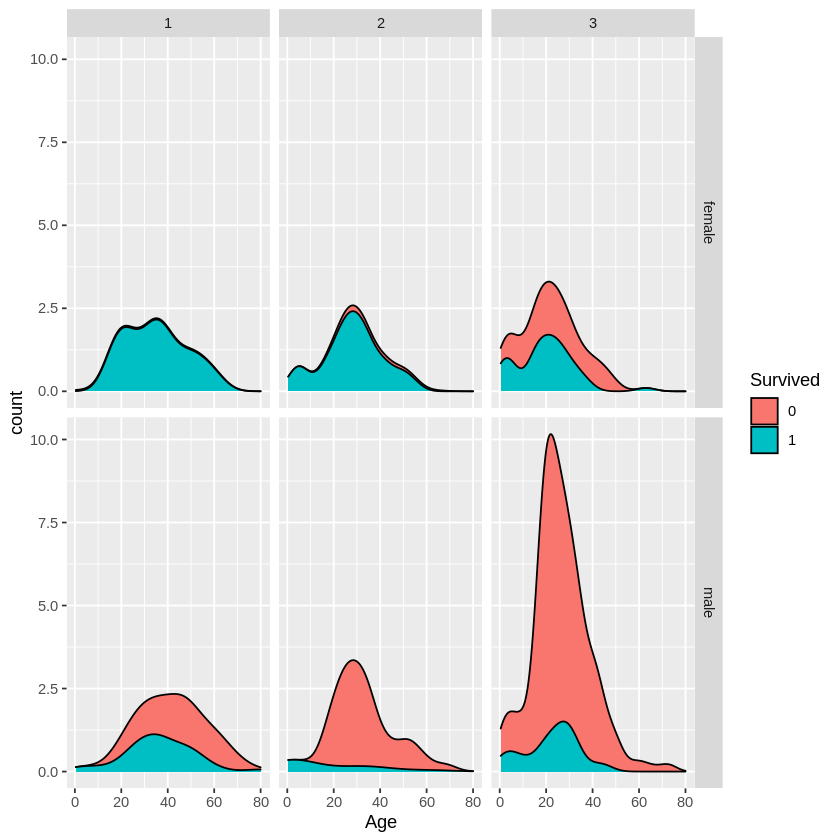

In [18]:
titanic %>%
    ggplot(aes(Age, y = ..count.., fill = Survived)) +
    geom_density(position = "stack") +
    facet_grid(Sex ~ Pclass)
        

- The largest group of passengers was third-class males.
- Most first-class and second-class females survived.
- Almost all second-class males did not survive, with the exception of children.